# San Francisco Crime Classification
## Predict the category of crimes that occurred in the city by the bay

### Overhead.

In [1]:
# File info.
__author__ = "Daniel de Souza Severo"
__email__ = "danielsouzasevero@gmail.com"
__status__ = "Still working on it!"

In [2]:
# Store some cool colors.
_colors = [ 
"#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
"#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
"#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
"#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
"#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
"#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
"#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]

### Variables to can play around with!

In [3]:
# Data is too big, define N as the number of training points we want to get (use inf to get all).
N = float('Inf')

# Color points by 'Category', 'PdDistrict', and 'Resolution'
# (you can add more, just make sure that it is an existing column in train.csv)
things_to_plot_by = ['Category', 'PdDistrict', 'Resolution']

### It all starts here!

In [4]:
# Imports
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas
%matplotlib inline

In [5]:
# Import training data.
data = pandas.read_csv('data/train.csv', nrows = N)

# Set some columns as categories (uses class pandas.Categorical).
data['Category'] = data['Category'].astype('category')
data['PdDistrict'] = data['PdDistrict'].astype('category')
data['Resolution'] = data['Resolution'].astype('category')

In [6]:
# Create city map Basemap class.
city_map = Basemap(llcrnrlon=-122.5192, urcrnrlat=37.8336, 
                   urcrnrlon=-122.3527, llcrnrlat=37.7080, projection='merc')

In [7]:
# Convert lon. and lat. to cartasian coordinates and add to data matrix.
data['x'], data['y'] = city_map(data['X'].values, data['Y'].values)

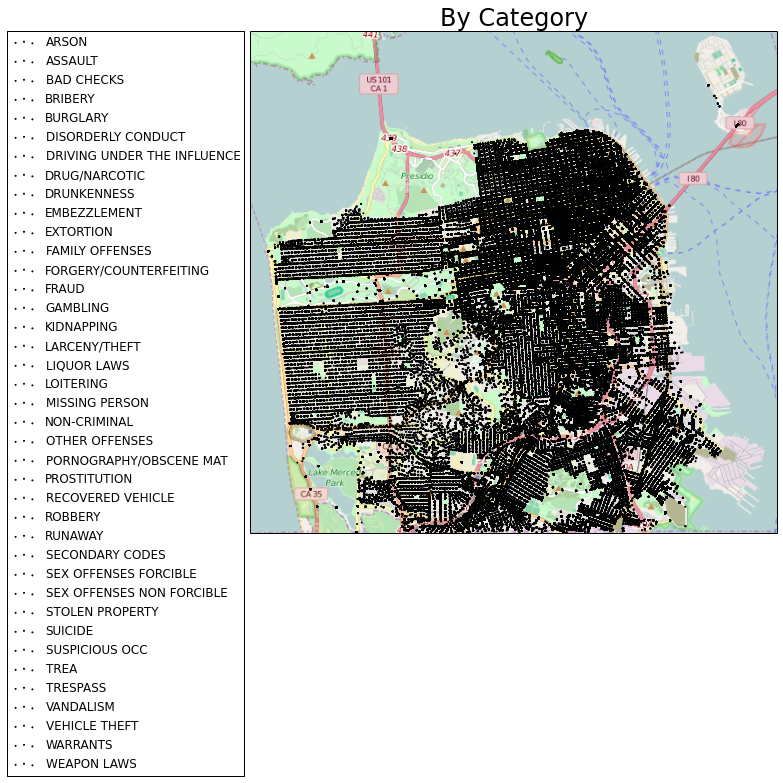

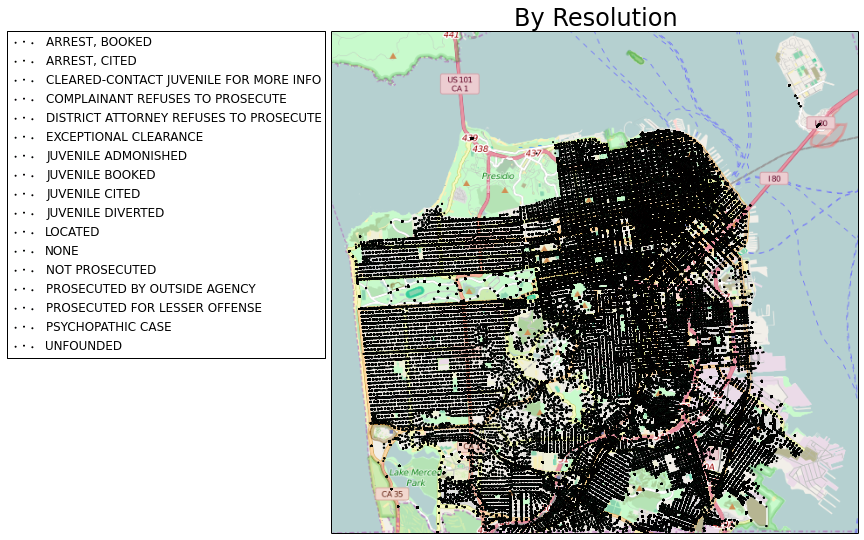

In [10]:
# Plot city map with background from OSM and some data points.

for thing in things_to_plot_by:
    
    # Define figure size.
    plt.figure(figsize=(16,9))

    # Plot (x,y) points color-coded with respect to the resolution.
    for res in data[thing].cat.categories:
        x = data.groupby(thing).get_group(res)['x']
        y = data.groupby(thing).get_group(res)['y']
        plt.scatter(x, y, s=1, c=_colors[data[thing].cat.categories.get_loc(res)])

    # Show city map.
    city_map.imshow(plt.imread('data/sf-osm-background.png'), origin='upper')

    # Add some stuff.
    plt.legend(data[thing].cat.categories, bbox_to_anchor=(0,1.011))
    plt.title('By '+ thing, fontdict = {'fontsize': 24})
    plt.show()